In [1]:
import os.path as path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style='whitegrid')
sns.set(font_scale=1.5)

In [2]:
# Data collected:
# probability
# num_steps_taken
# num_examinations
# num_cells_processed
# num_bumps
# num_plans
# runtime

In [3]:
data_dir = './data'

names = ['agent6', 'agent7', 'agent8']

# construct individual spreadsheets
agents = []
for name in names:
    parts = [pd.read_csv(path.join(data_dir, name, f'{i}-{name}-101x101-200x3.csv')) for i in range(1, 6)]
    agent = pd.concat(parts, axis=0, ignore_index=True)
    agent['agent'] = name
    agents.append(agent)

# construct master spreadsheet
all_data = pd.concat(agents, axis=0, ignore_index=True)

## Number of Steps Taken

In [4]:
# raw data
print('mean')
for name, agent in zip(names, agents):
    print(name, ': ', agent['num_steps_taken'].mean())

print()

print('median')
for name, agent in zip(names, agents):
    print(name, ': ', agent['num_steps_taken'].median())

mean
agent6 :  44408.482
agent7 :  39103.46333333333
agent8 :  15075.729333333333

median
agent6 :  17508.5
agent7 :  16002.5
agent8 :  11735.5


Text(0, 0.5, 'Average Number of Steps Taken')

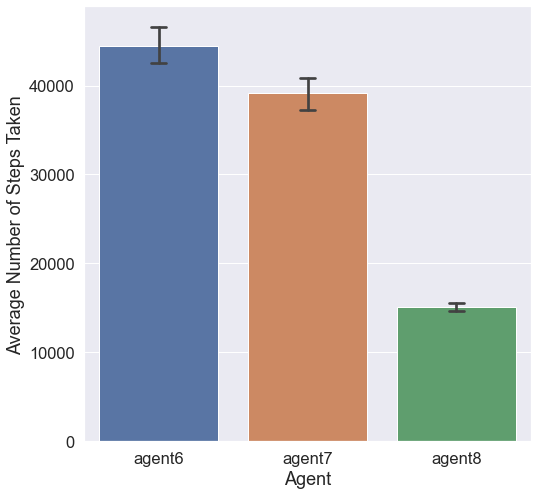

In [5]:
# bar plot
plt.figure(figsize=(8, 8))
ax = sns.barplot(data=all_data, x='agent', y='num_steps_taken', capsize=0.1)
plt.xlabel('Agent')
plt.ylabel('Average Number of Steps Taken')

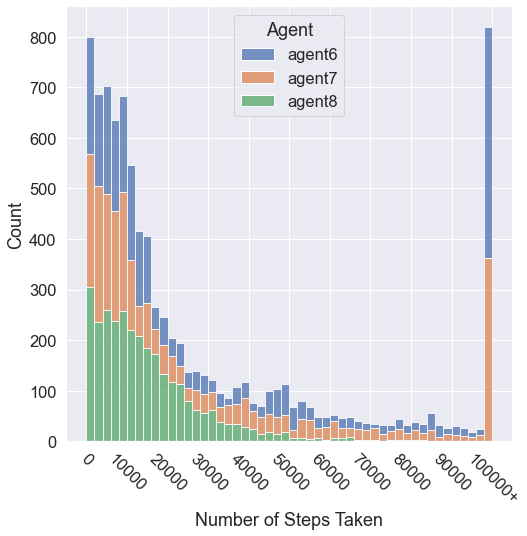

In [6]:
# histogram plot
plt.figure(figsize=(8, 8))
ax = sns.histplot(all_data, x=all_data['num_steps_taken'].clip(0, 100000),
                  binwidth=2000, hue='agent', multiple='stack')

ax.set_xticks(range(0, 100001, 10000))
ax.set_xticklabels((i if i != 100000 else '100000+' for i in range(0, 100001, 10000)))

plt.xlabel('Number of Steps Taken')
plt.xticks(rotation=-45)
ax.get_legend().set_title('Agent')

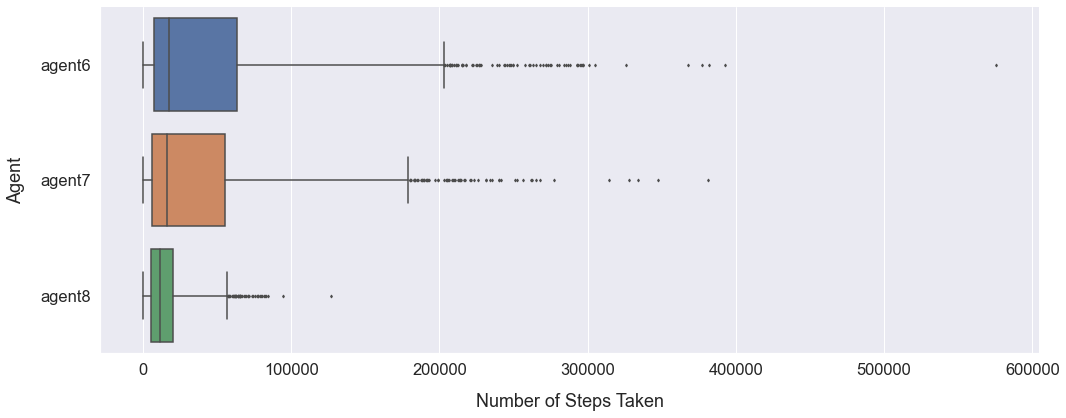

In [7]:
# boxplots
g = sns.catplot(data=all_data, x='num_steps_taken', y='agent', kind='box',
                height=6, aspect=2.5,
                whis=2.5, fliersize=2)
g.set_axis_labels('Number of Steps Taken', 'Agent', labelpad=15)

## Number of Examinations

In [8]:
#
print('mean')
for name, agent in zip(names, agents):
    print(name, ': ', agent['num_examinations'].mean())

print()

print('median')
for name, agent in zip(names, agents):
    print(name, ': ', agent['num_examinations'].median())

mean
agent6 :  13291.293
agent7 :  12547.621
agent8 :  16281.308

median
agent6 :  7089.0
agent7 :  7175.5
agent8 :  12264.5


Text(0, 0.5, 'Average Number of Examinations')

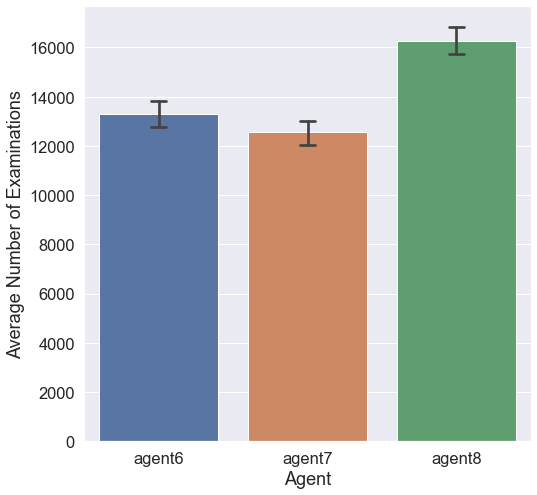

In [9]:
# bar plot
plt.figure(figsize=(8, 8))
ax = sns.barplot(data=all_data, x='agent', y='num_examinations', capsize=0.1)
plt.xlabel('Agent')
plt.ylabel('Average Number of Examinations')

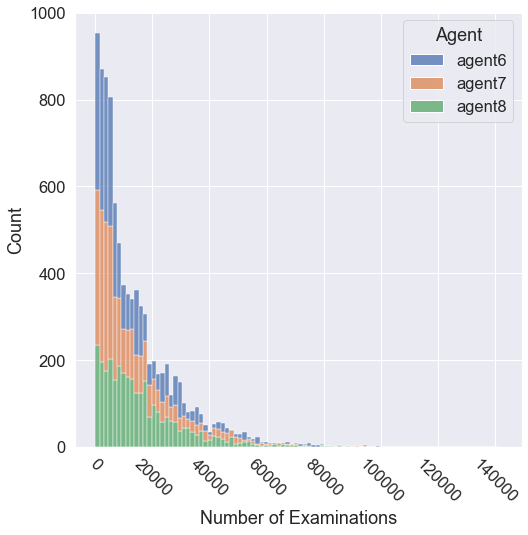

In [10]:
# histogram plot
plt.figure(figsize=(8, 8))
ax = sns.histplot(all_data, x='num_examinations',
                  hue='agent', multiple='stack')

plt.xlabel('Number of Examinations')
plt.xticks(rotation=-45)
ax.get_legend().set_title('Agent')

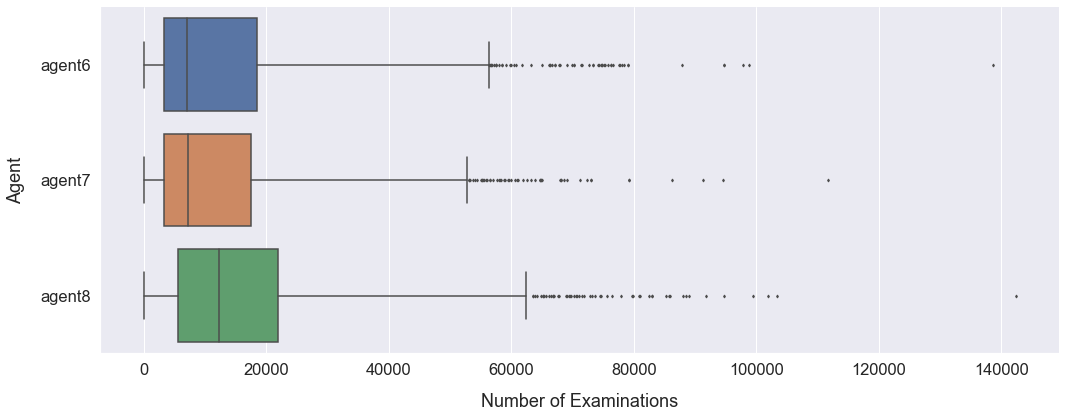

In [11]:
# boxplots
g = sns.catplot(data=all_data, x='num_examinations', y='agent', kind='box',
                height=6, aspect=2.5,
                whis=2.5, fliersize=2)
g.set_axis_labels('Number of Examinations', 'Agent', labelpad=15)

## Number of Actions

In [12]:
# raw data
print('mean')
for name, agent in zip(names, agents):
    print(name, ': ', (agent['num_steps_taken'] + agent['num_examinations']).mean())

print()

print('median')
for name, agent in zip(names, agents):
    print(name, ': ', (agent['num_steps_taken'] + agent['num_examinations']).median())
    
all_data['num_actions'] = all_data['num_steps_taken'] + all_data['num_examinations']

mean
agent6 :  57699.775
agent7 :  51651.08433333333
agent8 :  31357.037333333334

median
agent6 :  24685.0
agent7 :  23217.5
agent8 :  24075.5


Text(0, 0.5, 'Average Actions')

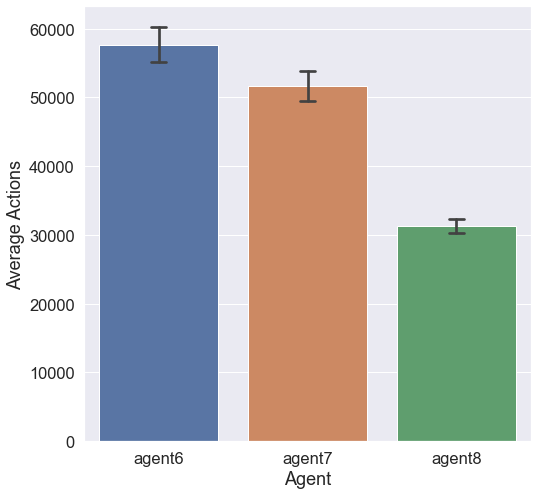

In [13]:
# bar plot
plt.figure(figsize=(8, 8))
ax = sns.barplot(data=all_data, x='agent', y='num_actions', capsize=0.1)
plt.xlabel('Agent')
plt.ylabel('Average Actions')

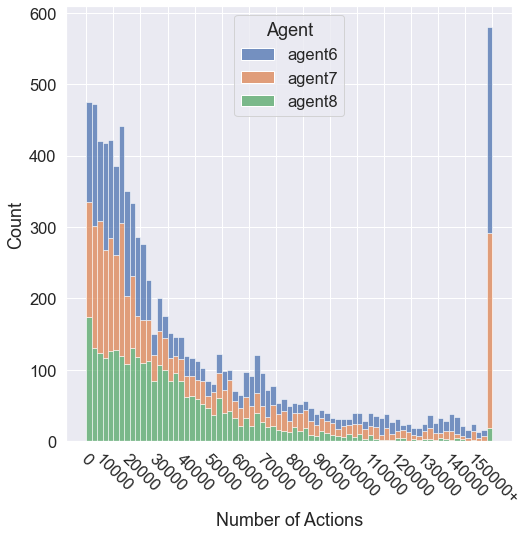

In [14]:
# histogram plot
plt.figure(figsize=(8, 8))
ax = sns.histplot(all_data, x=all_data['num_actions'].clip(0, 150000),
                  binwidth=2000, hue='agent', multiple='stack')

ax.set_xticks(range(0, 150001, 10000))
ax.set_xticklabels((i if i != 150000 else '150000+' for i in range(0, 150001, 10000)))

plt.xlabel('Number of Actions')
plt.xticks(rotation=-45)
ax.get_legend().set_title('Agent')

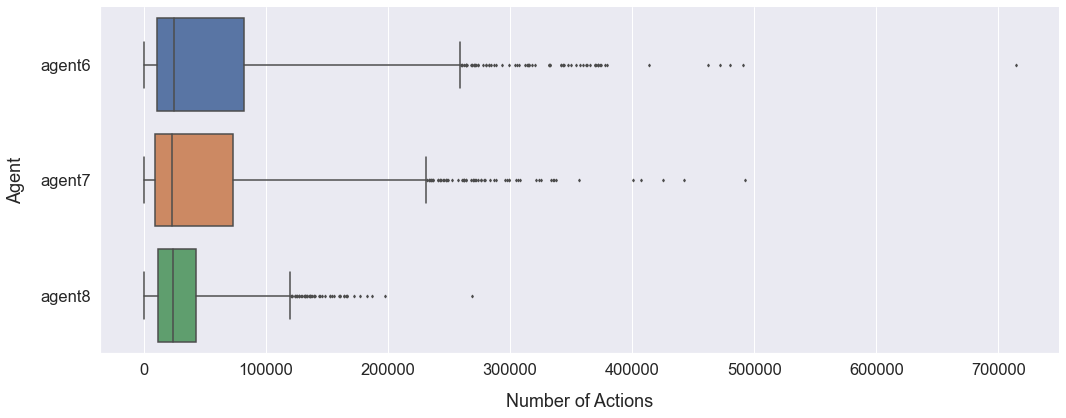

In [15]:
# boxplots
g = sns.catplot(data=all_data, x='num_actions', y='agent', kind='box',
                height=6, aspect=2.5,
                whis=2.5, fliersize=2)
g.set_axis_labels('Number of Actions', 'Agent', labelpad=15)

## Number of Cells Processed ($A^*$ search)

In [16]:
# raw data
print('mean')
for name, agent in zip(names, agents):
    print(name, ': ', agent['num_cells_processed'].mean())

print()

print('median')
for name, agent in zip(names, agents):
    print(name, ': ', agent['num_cells_processed'].median())

mean
agent6 :  13591450.538
agent7 :  13980350.488666667
agent8 :  12023507.123333333

median
agent6 :  17029860.0
agent7 :  17497373.5
agent8 :  13051830.0


Text(0, 0.5, 'Average Number of Cells Processed by A-star')

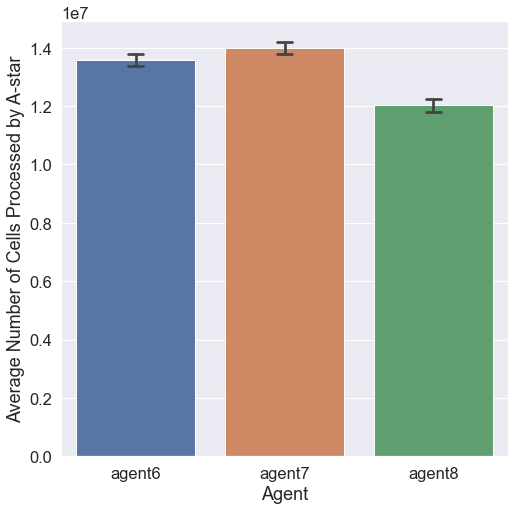

In [17]:
# bar plot
plt.figure(figsize=(8, 8))
ax = sns.barplot(data=all_data, x='agent', y='num_cells_processed', capsize=0.1)
plt.xlabel('Agent')
plt.ylabel('Average Number of Cells Processed by A-star')

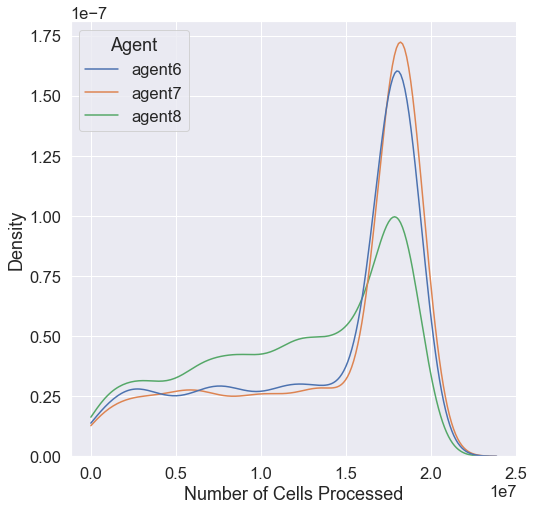

In [18]:
# kde plot
plt.figure(figsize=(8, 8))
ax = sns.kdeplot(data=all_data, x='num_cells_processed',
                 hue='agent', multiple='layer', clip=(0.0, 5e7), common_norm=False)

plt.xlabel('Number of Cells Processed')
ax.get_legend().set_title('Agent')

## Number of Bumps

In [19]:
# raw data
print('mean')
for name, agent in zip(names, agents):
    print(name, ': ', agent['num_bumps'].mean())

print()

print('median')
for name, agent in zip(names, agents):
    print(name, ': ', agent['num_bumps'].median())

mean
agent6 :  2235.861
agent7 :  2280.107
agent8 :  1937.2413333333334

median
agent6 :  2909.5
agent7 :  2932.0
agent8 :  2094.0


Text(0, 0.5, 'Average Number of Bumps')

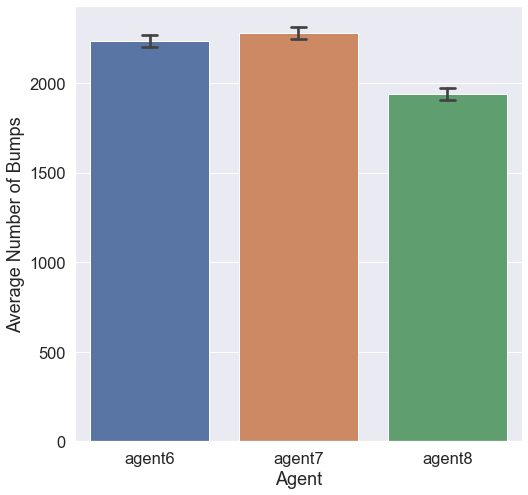

In [20]:
# bar plot
plt.figure(figsize=(8, 8))
ax = sns.barplot(data=all_data, x='agent', y='num_bumps', capsize=0.1)
plt.xlabel('Agent')
plt.ylabel('Average Number of Bumps')

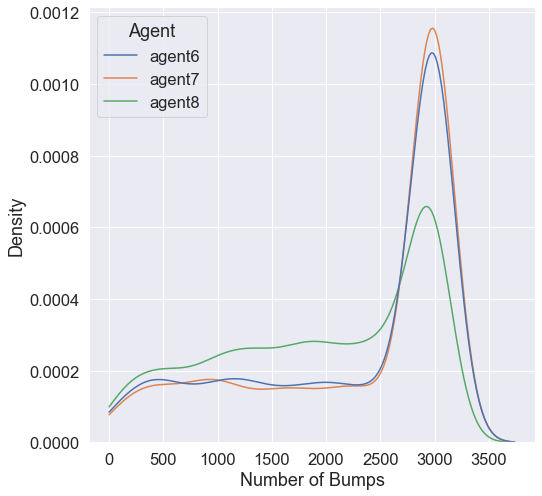

In [21]:
# kde plot
plt.figure(figsize=(8, 8))
ax = sns.kdeplot(data=all_data, x='num_bumps',
                 hue='agent', multiple='layer', clip=(0.0, 5e3), common_norm=False)

plt.xlabel('Number of Bumps')
ax.get_legend().set_title('Agent')

## Number of Plans

In [22]:
# raw data
print('mean')
for name, agent in zip(names, agents):
    print(name, ': ', agent['num_plans'].mean())

print()

print('median')
for name, agent in zip(names, agents):
    print(name, ': ', agent['num_plans'].median())

mean
agent6 :  16931.711
agent7 :  13669.290333333332
agent8 :  9921.965333333334

median
agent6 :  11956.5
agent7 :  10368.5
agent8 :  8881.0


Text(0, 0.5, 'Average Number of Planning Steps')

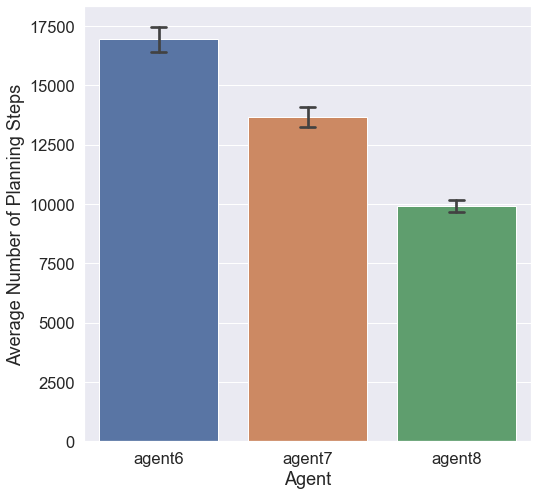

In [23]:
# bar plot
plt.figure(figsize=(8, 8))
ax = sns.barplot(data=all_data, x='agent', y='num_plans', capsize=0.1)
plt.xlabel('Agent')
plt.ylabel('Average Number of Planning Steps')

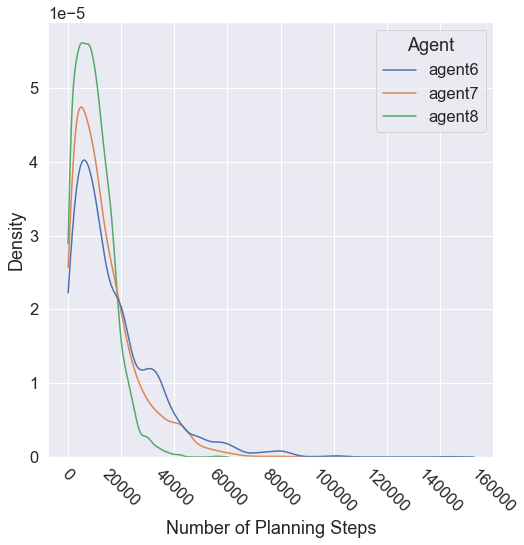

In [24]:
# kde plot
plt.figure(figsize=(8, 8))
ax = sns.kdeplot(data=all_data, x='num_plans',
                 hue='agent', multiple='layer', clip=(0.0, 200000), common_norm=False)

plt.xlabel('Number of Planning Steps')
plt.xticks(rotation=-45)
ax.get_legend().set_title('Agent')

## Number of Destinations

In [25]:
# raw data
print('mean')
for name, agent in zip(names, agents):
    print(name, ': ', (agent['num_plans'] - agent['num_bumps']).mean())

print()

print('median')
for name, agent in zip(names, agents):
    print(name, ': ', (agent['num_plans'] - agent['num_bumps']).median())
    
all_data['num_dest'] = all_data['num_plans'] - all_data['num_bumps']

mean
agent6 :  14695.85
agent7 :  11389.183333333332
agent8 :  7984.724

median
agent6 :  8996.0
agent7 :  7383.0
agent8 :  6792.0


Text(0, 0.5, 'Average Number of Destinations')

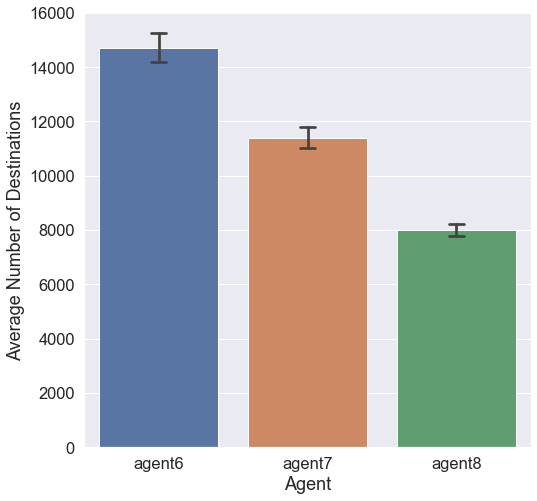

In [26]:
# bar plot
plt.figure(figsize=(8, 8))
ax = sns.barplot(data=all_data, x='agent', y='num_dest', capsize=0.1)
plt.xlabel('Agent')
plt.ylabel('Average Number of Destinations')

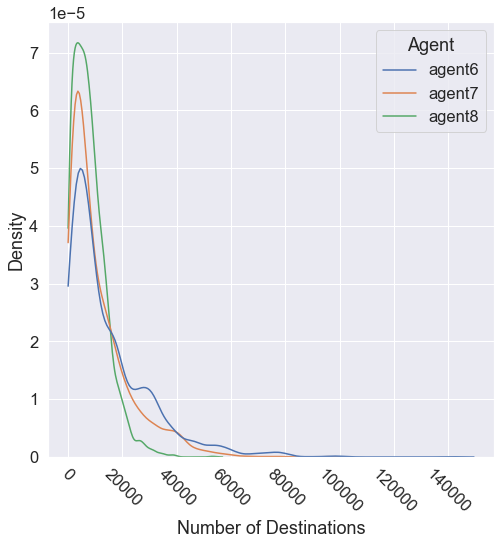

In [27]:
# kde plot
plt.figure(figsize=(8, 8))
ax = sns.kdeplot(data=all_data, x='num_dest',
                 hue='agent', multiple='layer', clip=(0.0, 200000), common_norm=False)

plt.xlabel('Number of Destinations')
plt.xticks(rotation=-45)
ax.get_legend().set_title('Agent')

## Runtime

In [28]:
# raw data
print('mean')
for name, agent in zip(names, agents):
    print(name, ': ', agent['runtime'].mean())

print()

print('median')
for name, agent in zip(names, agents):
    print(name, ': ', agent['runtime'].median())

mean
agent6 :  6.2830504497216575
agent7 :  6.082164782488669
agent8 :  7.1039933689246855

median
agent6 :  6.73327793
agent7 :  6.599645397
agent8 :  6.590999299


Text(0, 0.5, 'Average Runtime')

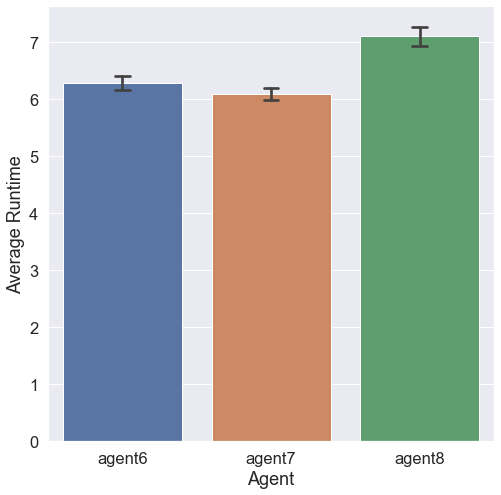

In [29]:
# bar plot
plt.figure(figsize=(8, 8))
ax = sns.barplot(data=all_data, x='agent', y='runtime', capsize=0.1)
plt.xlabel('Agent')
plt.ylabel('Average Runtime')

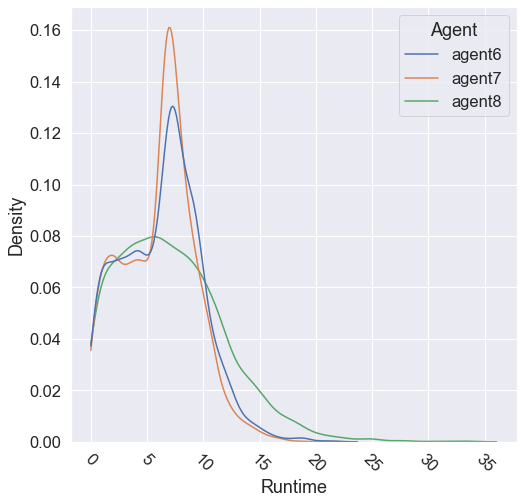

In [30]:
# kde plot
plt.figure(figsize=(8, 8))
ax = sns.kdeplot(data=all_data, x='runtime',
                 hue='agent', multiple='layer', clip=(0.0, 50), common_norm=False)

plt.xlabel('Runtime')
plt.xticks(rotation=-45)
ax.get_legend().set_title('Agent')